In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# import joblib

df = pd.read_excel('E:/Pawang Code/Diabetic Retinopathy/featureExtraction4.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image            3661 non-null   object 
 1   contrast_0       3661 non-null   float64
 2   dissimilarity_0  3661 non-null   float64
 3   homogeneity_0    3661 non-null   float64
 4   ASM_0            3661 non-null   float64
 5   energy_0         3661 non-null   float64
 6   correlation_0    3661 non-null   float64
 7   Label            3661 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 228.9+ KB


In [4]:
x = df.drop(['Label', 'Image'], axis=1)
y = df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test)

In [6]:
# find best parameter with svc
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              }
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.651 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.670 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.653 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.668 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.668 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.651 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [1]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

NameError: name 'grid' is not defined

In [36]:
print("score : ", clf.score(x_test, y_test))
# print("intercept : ", clf.intercept_)
# print("weight : ", clf.coef_)
# print("support vector : ", clf.support_)

score :  0.30357142857142855


In [15]:
joblib.dump(clf, 'C:/Users/user/Documents/Python/model_training.pkl')

['C:/Users/user/Documents/Python/model_training.pkl']

In [28]:
import os

root_path = os.getcwd()
root_path = root_path.replace("\\", "/")
print(root_path)

c:/Users/user/Documents/Python/DiabeticRetinopathy


In [15]:
tesModel = df.drop(['Label', 'Image'], axis=1)
hasil = clf.predict(tesModel)
# print(hasil)

midIndex = int(len(hasil)/2)
# print(hasil)

print(hasil[:midIndex])
print(hasil[midIndex:])

[0 0 0 2 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 3 1 3 1 3 4 1 3
 4 3 4 3 4 4 3 1 3 1 0 4 4 4 3 0 3 3 3 3 1 0 1 3 4 3 3 3 3 3 1 3 4 3 4 3 4
 4 1 4 0 3 4 3 1 3 3 3 3 4 3 1 3 3 3 4 4 4 3 4 3 3 0 4 1 0 3 4 4 3 3 4 1 1
 4 4 4 4 0 3 1 3 4 4 3 3 0 3 4 3 4 0 4 4 4 3 3 3 3 1 3 4 3 2 1 3 4 0 3 0 1
 4 2 3 3 3 3 1 3 1 3 3 4 3 2 1 4 4 4 3 4 1 4 4 0 3 1 3 0]
[4 4 1 1 1 2 2 0 3 2 0 1 4 0 3 1 4 3 4 4 0 3 4 3 3 3 1 4 0 4 0 4 3 3 4 1 4
 1 1 3 1 2 3 4 4 4 1 3 0 4 3 3 4 4 3 3 4 4 1 3 4 4 3 4 4 4 1 4 4 4 4 4 4 4
 3 4 3 3 3 4 0 4 1 3 4 3 4 4 3 3 1 3 3 3 3 0 0 0 4 3 4 4 4 4 3 4 3 3 3 3 0
 3 4 3 4 4 3 1 3 4 4 0 1 4 3 1 3 3 4 3 3 3 4 0 4 3 4 4 3 1 0 4 4 4 2 4 3 1
 1 4 4 4 4 1 1 4 4 4 4 4 4 4 4 4 4 0 3 4 3 0 4 1 1 4 3 3 4 3 4 4 4 4 1 4 2
 3 4 4 3 4 4 1 4 3 1 1 0 3 1 1 3 4 4 0 3 4 4 4 4 3 1 4 4 1 4 4 3 4 1 3 4 0
 4 4 4 3 1 4 4 4 4 1 3 3 4 3 0 0 4 3 4 1 1

ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 500.

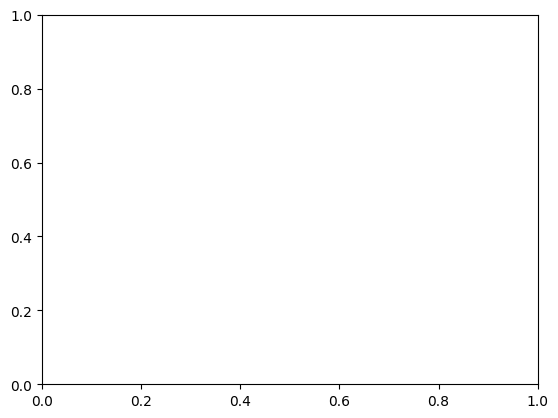

In [23]:
import matplotlib.pyplot as plt
import numpy as np

color = ['blue' if c == 0 else 'red' for c in y]
plt.scatter(x['contrast_0'], x['dissimilarity_0'], c=color)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

ValueError: n_features must be equal to 2. Got 6 instead.

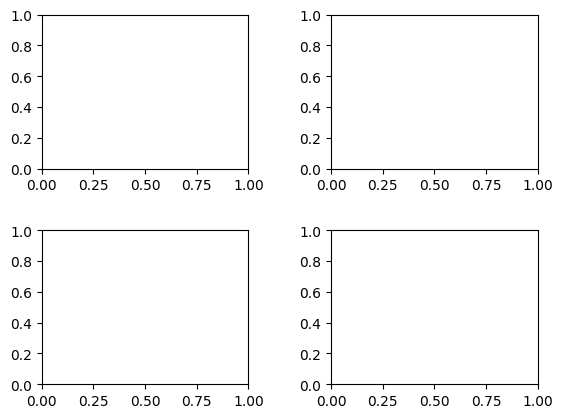

In [22]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(x_train, y_train) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_train['contrast_0'], x_train['dissimilarity_0']

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='tes',
        ylabel='tes2',
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()